In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
standardized_subsetted_glacier = pd.read_csv("/Users/mdbarshay/Documents/GlacialModeling/MR_standardized_subsetted_glacier.csv", index_col=0)

In [45]:
full_glacier = pd.read_csv("/Users/mdbarshay/Documents/GlacialModeling/full_glacier.csv", index_col=0)

In [46]:
standardized_subsetted_glacier

,index,x_coord,y_coord,elevation,predictions
94557,94556,-0.380760,-1.672476,-2.811489,1.375441
94558,94557,-0.371680,-1.672476,-2.814555,1.375235
95238,95237,-0.398921,-1.663764,-2.766205,1.399129
95239,95238,-0.389840,-1.663764,-2.781635,1.384309
95240,95239,-0.380760,-1.663764,-2.790048,1.385925
...,...,...,...,...,...
403479,403478,1.489801,2.265072,-0.600688,1.108718
403480,403479,1.498881,2.265072,-0.584259,1.122945
403481,403480,1.507962,2.265072,-0.568408,1.138220
404163,404162,1.498881,2.273783,-0.634687,1.085504


In [47]:
full_glacier

,index,x_coord,y_coord,elevation
1,0,408200,430400,0.0
2,1,408300,430400,0.0
3,2,408400,430400,0.0
4,3,408500,430400,0.0
5,4,408600,430400,0.0
...,...,...,...,...
478779,478778,476000,500400,0.0
478780,478779,476100,500400,0.0
478781,478780,476200,500400,0.0
478782,478781,476300,500400,0.0


In [48]:
merged_standardized_glacier = full_glacier.merge(standardized_subsetted_glacier, how="left", on="index", suffixes=("_unstand", "_stand"))

In [49]:
merged_standardized_glacier = merged_standardized_glacier[["index", "x_coord_unstand", "y_coord_unstand", "predictions"]]

In [50]:
merged_standardized_glacier["predictions"] = merged_standardized_glacier["predictions"].fillna(0)

In [51]:
merged_standardized_glacier

,index,x_coord_unstand,y_coord_unstand,predictions
0,0,408200,430400,0.0
1,1,408300,430400,0.0
2,2,408400,430400,0.0
3,3,408500,430400,0.0
4,4,408600,430400,0.0
...,...,...,...,...
478778,478778,476000,500400,0.0
478779,478779,476100,500400,0.0
478780,478780,476200,500400,0.0
478781,478781,476300,500400,0.0


In [52]:
merged_standardized_glacier.rename(columns={"x_coord_unstand":"x_coord", "y_coord_unstand":"y_coord"}, inplace=True)

In [53]:
merged_standardized_glacier

,index,x_coord,y_coord,predictions
0,0,408200,430400,0.0
1,1,408300,430400,0.0
2,2,408400,430400,0.0
3,3,408500,430400,0.0
4,4,408600,430400,0.0
...,...,...,...,...
478778,478778,476000,500400,0.0
478779,478779,476100,500400,0.0
478780,478780,476200,500400,0.0
478781,478781,476300,500400,0.0


In [54]:
merged_standardized_glacier.sort_values(by=["x_coord", "y_coord"], ascending=False, inplace=True)

In [55]:
pivot_table = pd.pivot_table(merged_standardized_glacier, index="y_coord", columns="x_coord", values="predictions", sort=False)

<AxesSubplot:xlabel='x_coord', ylabel='y_coord'>

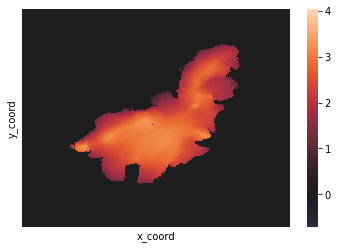

In [56]:
sns.heatmap(pivot_table, xticklabels=False, yticklabels=False, center=0)